In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools
import math
from scipy import stats

In [2]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

#plotの文字定義
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'

os.makedirs("./w_record/", exist_ok=True)
os.makedirs("./s_record/", exist_ok=True)

In [3]:
#関数の定義
def getNear(list, num):
    """
    概要: リストからある値に最も近い値を返却する関数
    @param list: データ配列
    @param num: 対象値
    @return 対象値に最も近い値
    """

    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(list) - num).argmin()
    return idx

In [4]:
alpha = 0.025
beta = 0.05
side = 41
square = side**2
idx_list = list(range(side))
l_list = [round(n*alpha, 2) for n in idx_list]
idx_vlist = list(range(side))
v_list = [round(n*beta, 2) for n in idx_list]
len_v = len(v_list)
df_LV = pd.DataFrame(np.zeros(square).reshape(side, side),columns=l_list,index=v_list)
df_S = pd.DataFrame(np.zeros(square).reshape(side ,side),columns=l_list,index=v_list)
# print(LV)
dt = 5
t_end=365
len_t = 1+int(t_end/dt)
# print (len_t)
p = 1
h=0.01
a=0.01
u=0.0001
k=0.01
print(len_v)

41


In [5]:
for kk in range(len_t):
    t = round(t_end-kk*dt, 1)
    csvname_w='./w_record/'+"t="+str(t)+'.csv'
    df_LV.to_csv(csvname_w)
    csvname_s='./s_record/'+"t="+str(t)+'.csv'
    df_S.to_csv(csvname_s)
    for i in range(len_v):
        for j in range(len_v):
            s_list=list()
            w_list=list()
            l  = round(i/(len_v-1),1)
            v  = round(j/(len_v-1),1)

            ll = (1-dt*((h/(1+a*v))+u))*l
            l_near_idx = getNear(l_list, ll)
            l_near = l_list[l_near_idx]
            # +-1に注意
            if l_near<ll:
                l1 = l_near
                l2 = l_list[l_near_idx+1]
                l1_idx = l_near_idx
                l2_idx = l_near_idx+1
            else:
                l1 = l_list[l_near_idx-1]
                l2 = l_near
                l1_idx = l_near_idx-1
                l2_idx = l_near_idx
            
            vv = v*(1-k*dt)
            v_near_idx = getNear(v_list, vv)
            v_near = v_list[v_near_idx]
            if v_near<vv:
                v_near_idx = v_near_idx+1
                v_near = v_list[v_near_idx]
            # print(l2_idx, v_near_idx)
            # print(l2)

            for ii in range(v_near_idx, len_v):
                
                w2 = df_LV.iat[l2_idx,ii]
                w1 = df_LV.iat[l1_idx,ii]
                s=v_list[ii] - v*(1-k*dt)
                w =(p-s)*ll +((l2-ll)*w2 + (ll-l1)*w1)/alpha
                
                s_list.append(s)
                w_list.append(w)
            
            w_max = max(w_list)
            w_max_index = np.argmax(w_list)
            # print(w_max_index)
            s = float(s_list[w_max_index])
            # print("l=",l,"v=",v,"w=",w_max,"s=",s)
            df_LV.iat[i,j]=w_max
            df_S.iat[i,j]=s
    print("t=", t)



t= 365
t= 360
t= 355
t= 350
t= 345
t= 340
t= 335
t= 330
t= 325
t= 320
t= 315
t= 310
t= 305
t= 300
t= 295
t= 290
t= 285
t= 280
t= 275
t= 270
t= 265
t= 260
t= 255
t= 250
t= 245
t= 240
t= 235
t= 230
t= 225
t= 220
t= 215
t= 210
t= 205
t= 200
t= 195
t= 190
t= 185
t= 180
t= 175
t= 170
t= 165
t= 160
t= 155
t= 150
t= 145
t= 140
t= 135
t= 130
t= 125
t= 120
t= 115
t= 110
t= 105
t= 100
t= 95
t= 90
t= 85
t= 80
t= 75
t= 70
t= 65
t= 60
t= 55
t= 50
t= 45
t= 40
t= 35
t= 30
t= 25
t= 20
t= 15
t= 10
t= 5
t= 0


In [6]:
#L, V plot
L = 1
V = 0
tt = 0


L_list = [L]
V_list = [V]
t_list = [tt]
ss_list =[0]
for i in range(len_t):
  tt = round(dt*i, 2)
  # print(tt)
  L_near_idx = getNear(l_list, L)
  V_near_idx = getNear(v_list, V)
  filename = "./s_record/t=" + str(tt) + ".csv"
  with open(filename) as f:
    reader = csv.reader(f)
    l = [row for row in reader]

  s = float(l[L_near_idx][V_near_idx])
  # print(s)
  # s = float(s.replace('．', '.'))
  L = L - ((h/(1+a*V))+u)*L*dt
  V = V + (s - k*V)*dt
  t_list.append(tt)
  L_list.append(L)
  V_list.append(V)
  ss_list.append(s)


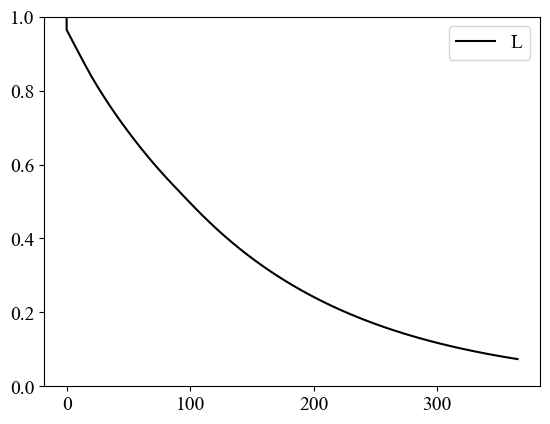

In [7]:
Figure, ax = plt.subplots()
ax.plot(t_list, L_list, color = "black", label="L")
ax.set_ylim([0,1])
ax.legend()

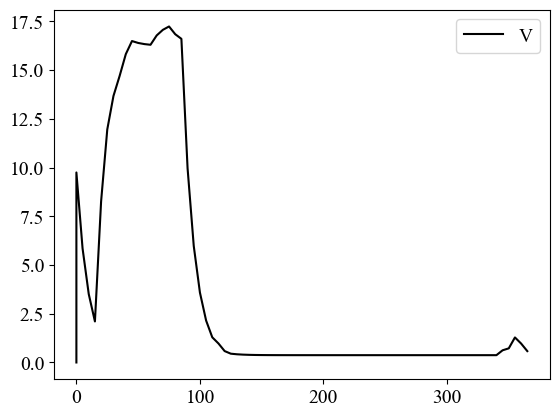

In [8]:
plt.plot(t_list, V_list, color = "black", label="V")
plt.legend()

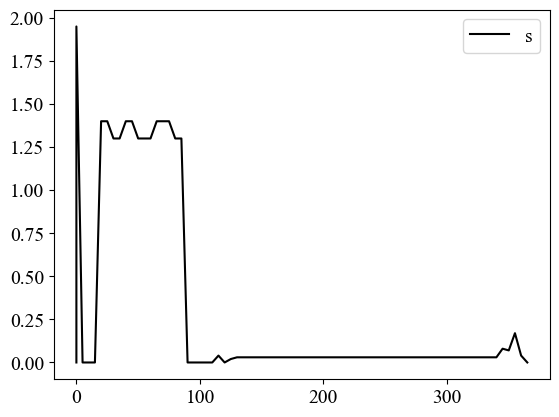

In [9]:
plt.plot(t_list, ss_list, color = "black", label="s")
plt.legend()